In [1]:
import sys
sys.path.append('../')
import os
os.chdir('../')
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import numpy as np
import collections

In [2]:
mdm = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-09-26-14-22-13_mdm/all.npy', allow_pickle=True)
md = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-09-30-20-26-14_MotionDiffuse/all.npy', allow_pickle=True)
mld = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-09-25-22-34-06_mld/all.npy', allow_pickle=True)
t2mgpt = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-10-01-14-28-44_T2M-GPT/all.npy', allow_pickle=True)
attt2m = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-10-30-20-36-50_AttT2M-gtlen/all.npy', allow_pickle=True)
_10step = np.load('/data/epinyoan/git/MaskText2Motion/T2M-BD/output/speedtest/2023-10-01-13-34-26_exit2m-10steps-rmdup/all.npy', allow_pickle=True)

/home/epinyoan/miniconda3/envs/T2M-GPT/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


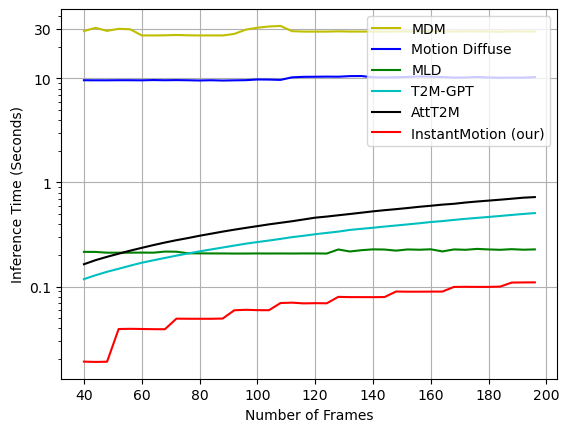

In [5]:
def get_speed(data, color, label):
    speed = {}
    for i in range(len(data)):
        if data is t2mgpt:
            l = data[i]['pred_len']
        else:
            l = data[i]['length'].item()
        if l not in speed:
            speed[l] = []
        speed[l].append(data[i]['time'])
    avg_speed = {}
    speed = collections.OrderedDict(sorted(speed.items()))
    for k, v in speed.items():
        if k >= 40:
            avg_speed[k] = np.array(v).mean()
    plt.plot(avg_speed.keys(), avg_speed.values(), color, label=label)
    return avg_speed
plt.yscale('log',base=10) 
plt.grid(True)
plt.yticks([.1,1,10, 30], [.1,1,10, 30])
plt.xlabel("Number of Frames")
plt.ylabel("Inference Time (Seconds)")
mdm_speed = get_speed(mdm, 'y', 'MDM')
md_speed = get_speed(md, 'b', 'Motion Diffuse')
mld_speed = get_speed(mld, 'g', 'MLD')
t2mgpt_speed = get_speed(t2mgpt, 'c', 'T2M-GPT')
attt2m_speed = get_speed(attt2m, 'k', 'AttT2M')
_10step_speed = get_speed(_10step, 'r', 'InstantMotion (our)')
plt.legend()

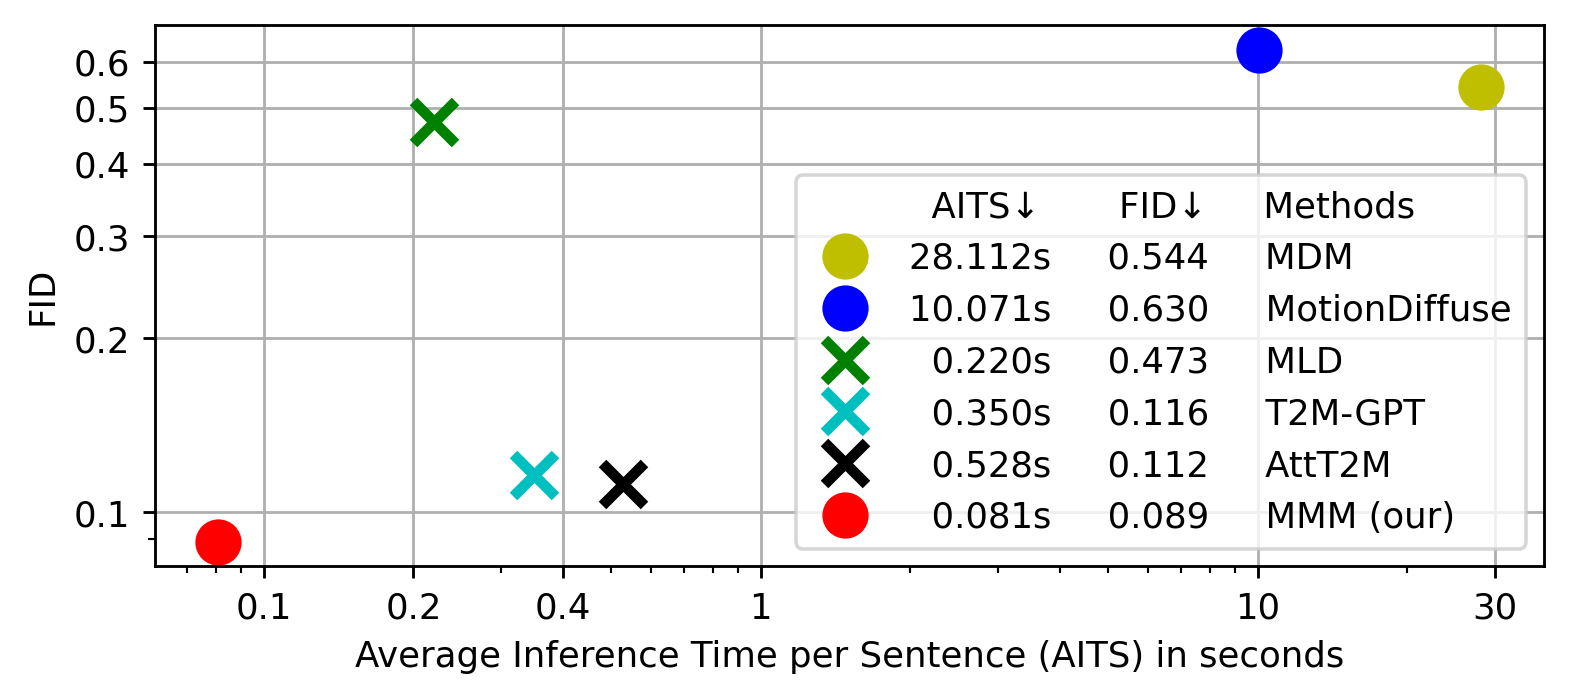

In [86]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(dpi=256)
plt.xscale('log',base=10) 
plt.yscale('log',base=10) 
plt.grid(True)
plt.xticks([.1, .2, .4, 1,10, 30], [.1, .2, .4, 1,10, 30])
plt.yticks([.1, .2, .3, .4, .5, .6], [.1, .2, .3, .4, .5, .6])
plt.xlabel("Average Inference Time per Sentence (AITS) in seconds")
plt.ylabel("FID")
plt.plot(28.112, 0.544, '.', markersize=12, color='w',          label='  AITS↓       FID↓     Methods')
plt.plot(28.112, 0.544, 'o', markersize=12, color='y',          label='28.112s     0.544     MDM')
plt.plot(10.071, 0.630, 'o', markersize=12, color='b',          label='10.071s     0.630     MotionDiffuse')
plt.plot(0.220, 0.473, 'x', mew=3, markersize=12, color='g',    label='  0.220s     0.473     MLD')
plt.plot(0.350, 0.116, 'x', mew=3, markersize=12, color='c',    label='  0.350s     0.116     T2M-GPT')
plt.plot(0.528, 0.112, 'x', mew=3, markersize=12, color='k',    label='  0.528s     0.112     AttT2M')
plt.plot(0.081, 0.089, 'o', markersize=12, color='r',           label='  0.081s     0.089     MMM (our)')
plt.rcParams["figure.figsize"] = (7, 2.8)

plt.legend()
plt.savefig('speed_all.pdf', bbox_inches='tight')

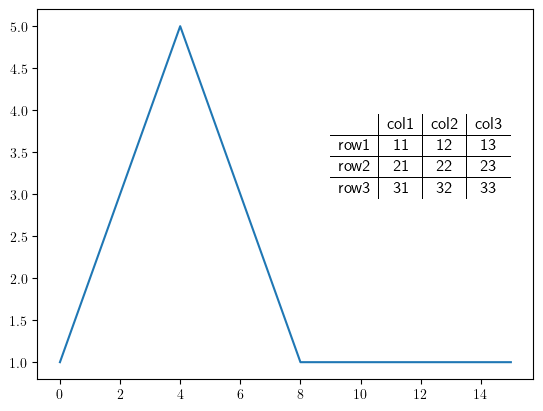

In [4]:
import pylab as plt
import matplotlib as mpl

mpl.rc('text', usetex=True)
plt.figure()
ax=plt.gca()
y=[1,2,3,4,5,4,3,2,1,1,1,1,1,1,1,1]
#plt.plot([10,10,14,14,10],[2,4,4,2,2],'r')
col_labels=['col1','col2','col3']
row_labels=['row1','row2','row3']
table_vals=[11,12,13,21,22,23,31,32,33]
table = r'''\begin{tabular}{ c | c | c | c } & col1 & col2 & col3 \\\hline row1 & 11 & 12 & 13 \\\hline row2 & 21 & 22 & 23 \\\hline  row3 & 31 & 32 & 33 \end{tabular}'''
plt.text(9,3.4,table,size=12)
plt.plot(y)
plt.show()